# How the data looks

for this notwbook you need to additionally install [```rdkit```](https://www.rdkit.org/)

```pip install rdkit```


First of all we need to open the ogb-molhiv data

In [174]:
# Thanke to https://github.com/snap-stanford/ogb/issues/109 for this snippet

import pandas as pd
from rdkit.Chem.rdmolfiles import MolFromSmiles
from rdkit.Chem.Draw import MolToImage, IPythonConsole #Needed to show molecules
from pathlib import Path

# Load Data (assumes you have downloaded the data at data root)
data_root = Path("/work/dlclarge2/haeringz-bigdata/data/")
file = "graph/ogbg_molhiv/mapping/mol.csv.gz"
molhiv_df = pd.read_csv(data_root / file)

Make sure that the table is looking fine!

And take a random molecule

In [175]:
# Peek into the table
head = molhiv_df.head(5)
print(head)

row_count = len(molhiv_df.index)
from random import randint
rand_mol_idx = randint(0, row_count - 1)
print(f"There are a total of {row_count} molecules given, we are looking at number {rand_mol_idx+1}")

# look at the *smile* representation of one molecule
smiles = molhiv_df.smiles[rand_mol_idx ]
print(smiles)

   HIV_active                                             smiles  mol_id
0           0  CCC1=[O+][Cu-3]2([O+]=C(CC)C1)[O+]=C(CC)CC(CC)...     NaN
1           0  C(=Cc1ccccc1)C1=[O+][Cu-3]2([O+]=C(C=Cc3ccccc3...     NaN
2           0                   CC(=O)N1c2ccccc2Sc2c1ccc1ccccc21     NaN
3           0    Nc1ccc(C=Cc2ccc(N)cc2S(=O)(=O)O)c(S(=O)(=O)O)c1     NaN
4           0                             O=S(=O)(O)CCS(=O)(=O)O     NaN
There are a total of 41127 molecules given, we are looking at number 38957
O=C(NNC(=O)c1ccccc1O)c1ccc(O)cc1


We can use an online Database to get more information on the molecules

In [176]:
from urllib.request import urlopen

def CIRconvert(smi):
    base = "https://cactus.nci.nih.gov/chemical/structure/" + smi
    try:
        url = base + "/iupac_name" 
        ans = urlopen(url).read().decode('utf8')
        name = ans
    except:
        name = 'Name Not Available'

    try:
        url = base + "/formula" 
        ans = urlopen(url).read().decode('utf8')
        formula = ans
    except:
        formula = 'Formula Not Available'

    return name, formula

name, formula = CIRconvert(smiles)
print(f"The molecule: '{smiles}'\n has the IUPAC name '{name}' and\n chemical formula '{formula}'")

The molecule: 'O=C(NNC(=O)c1ccccc1O)c1ccc(O)cc1'
 has the IUPAC name '2-hydroxy-N'-(4-hydroxybenzoyl)benzohydrazide' and
 chemical formula 'C14H12N2O4'


Lets have a look at the structure of the molecule!

feel free to change the bool to add the plot to the readme!

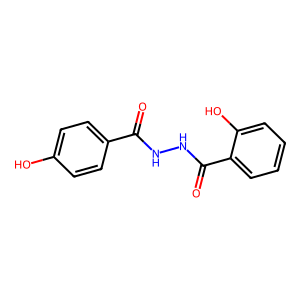

In [177]:
mol = MolFromSmiles(smiles)
from PIL.Image import Image
SAVE_PLOT_FOR_README: bool = True

img: Image = MolToImage(mol)

if SAVE_PLOT_FOR_README:
    plot_name = "random_molecule.png"
    img.save(plot_name)

img

OGB uses [this script](https://github.com/snap-stanford/ogb/blob/master/ogb/utils/mol.py) to transform the molecules into graph objects.

The `PygGraphPropPredDataset` will take care of this.

In [178]:
from ogb.utils import smiles2graph
graph = smiles2graph(smiles)
print(graph)

{'edge_index': array([[ 0,  1,  1,  2,  2,  3,  3,  4,  4,  5,  4,  6,  6,  7,  7,  8,
         8,  9,  9, 10, 10, 11, 11, 12,  1, 13, 13, 14, 14, 15, 15, 16,
        16, 17, 16, 18, 18, 19, 11,  6, 19, 13],
       [ 1,  0,  2,  1,  3,  2,  4,  3,  5,  4,  6,  4,  7,  6,  8,  7,
         9,  8, 10,  9, 11, 10, 12, 11, 13,  1, 14, 13, 15, 14, 16, 15,
        17, 16, 18, 16, 19, 18,  6, 11, 13, 19]]), 'edge_feat': array([[1, 0, 1],
       [1, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 0],
       [0, 0, 0],
       [0, 0, 1],
       [0, 0, 1],
       [1, 0, 1],
       [1, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [3, 0, 1],
       [3, 0, 1],
       [3, 0, 1],
       [3, 0, 1],
       [3, 0, 1],
       [3, 0, 1],
       [3, 0, 1],
       [3, 0, 1],
       [3, 0, 1],
       [3, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [3, 0, 1],
       [3, 0, 1],
       [3, 0, 1],
       [3, 0, 1],
       [3, 0, 1],
       [3, 0, 1],
       [

In [179]:
print(graph.keys())

line = "\n" + "=" * 80 + "\n"
print(line)

node_feat = graph["node_feat"]
# print(mol.GetNumAtoms())
print(f"{node_feat.shape=} : (num_atoms, atomfeat_dim), representing atom features")
print(f"{node_feat=}")

print(line)

edge_feat = graph["edge_feat"]
print(f"{edge_feat.shape=} :  (num_bonds, bondfeat_dim), representing chemical bond features")
print(f"{edge_feat=}")

print(line)

dict_keys(['edge_index', 'edge_feat', 'node_feat', 'num_nodes'])


node_feat.shape=(20, 9) : (num_atoms, atomfeat_dim), representing atom features
node_feat=array([[7, 0, 1, 5, 0, 0, 1, 0, 0],
       [5, 0, 3, 5, 0, 0, 1, 0, 0],
       [6, 0, 3, 5, 1, 0, 1, 0, 0],
       [6, 0, 3, 5, 1, 0, 1, 0, 0],
       [5, 0, 3, 5, 0, 0, 1, 0, 0],
       [7, 0, 1, 5, 0, 0, 1, 0, 0],
       [5, 0, 3, 5, 0, 0, 1, 1, 1],
       [5, 0, 3, 5, 1, 0, 1, 1, 1],
       [5, 0, 3, 5, 1, 0, 1, 1, 1],
       [5, 0, 3, 5, 1, 0, 1, 1, 1],
       [5, 0, 3, 5, 1, 0, 1, 1, 1],
       [5, 0, 3, 5, 0, 0, 1, 1, 1],
       [7, 0, 2, 5, 1, 0, 1, 0, 0],
       [5, 0, 3, 5, 0, 0, 1, 1, 1],
       [5, 0, 3, 5, 1, 0, 1, 1, 1],
       [5, 0, 3, 5, 1, 0, 1, 1, 1],
       [5, 0, 3, 5, 0, 0, 1, 1, 1],
       [7, 0, 2, 5, 1, 0, 1, 0, 0],
       [5, 0, 3, 5, 1, 0, 1, 1, 1],
       [5, 0, 3, 5, 1, 0, 1, 1, 1]])


edge_feat.shape=(42, 3) :  (num_bonds, bondfeat_dim), representing chemical bond features
edge_feat=array([[1, 0, 1],
  

In [185]:
from ogb.graphproppred.mol_encoder import AtomEncoder, BondEncoder
from torch import Tensor
atom_encoder = AtomEncoder(emb_dim = 100)
bond_encoder = BondEncoder(emb_dim = 100)

# expects a batch
node_feats = Tensor(node_feat).int().unsqueeze(dim=0).unsqueeze(dim=0)
edge_feats = Tensor(edge_feat).int().unsqueeze(dim=0).unsqueeze(dim=0)

atom_emb = atom_encoder(node_feats)
edge_emb = bond_encoder(edge_feats)

print(line)

print(atom_emb)

print(line)

print(edge_emb)

print(line)



tensor([[[[ 0.0289,  0.1539, -0.0750,  ..., -0.0235,  0.0056,  0.1364],
          [ 0.0637, -0.1300, -0.0063,  ..., -0.0075,  0.0160,  0.0339],
          [ 0.0120,  0.0320,  0.0470,  ..., -0.0419,  0.0892, -0.0123],
          ...,
          [ 0.0120,  0.0320,  0.0470,  ..., -0.0419,  0.0892, -0.0123],
          [ 0.0637, -0.1300, -0.0063,  ..., -0.0075,  0.0160,  0.0339],
          [ 0.0637, -0.1300, -0.0063,  ..., -0.0075,  0.0160,  0.0339]],

         [[ 0.0585, -0.0566,  0.1338,  ..., -0.1395, -0.0991, -0.0450],
          [ 0.0637, -0.1300, -0.0063,  ..., -0.0075,  0.0160,  0.0339],
          [ 0.0142, -0.0852, -0.0968,  ..., -0.1427,  0.1443, -0.0203],
          ...,
          [ 0.0120,  0.0320,  0.0470,  ..., -0.0419,  0.0892, -0.0123],
          [ 0.0637, -0.1300, -0.0063,  ..., -0.0075,  0.0160,  0.0339],
          [ 0.0637, -0.1300, -0.0063,  ..., -0.0075,  0.0160,  0.0339]],

         [[ 0.0139,  0.0246, -0.0932,  ..., -0.0765,  0.1417,  0.0655],
          [ 0.0637, -0.1300,